<a href="https://www.kaggle.com/code/eharlett/predicting-kid-friendly-nic-cage-movies?scriptVersionId=131696507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Kid-Friendly Nic Cage Movies

Although most known for his thriller, action, and horror work that is aimed at adults, Nicolas Cage has also acted in several all-ages or kid's movies.

For this notebook, I wanted to see if I could use the numerical features of the data set to predict whether a Nic Cage movie is kid-friendly (rated PG or PG-13) or not.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd

In [2]:
# Read in data set
cage = pd.read_csv('../input/nic-cage-movies/nic-cage-through-2021.csv',encoding='Latin1')

In [3]:
# Visualize data
cage

,Movie,Rating,Character,Voice,Year,RottenTomatoes
0,Pig,R,Robin Feld,0,2021,97
1,Willy's Wonderland,NR,The Janitor,0,2021,61
2,Prisoners of the Ghostland,NR,Hero,0,2021,62
3,The Croods: A New Age,PG,Grug,1,2020,77
4,Jiu Jitsu,R,Wylie,0,2020,28
...,...,...,...,...,...,...
96,Racing with the Moon,PG,Nicky,0,1984,60
97,Rumble Fish,R,Smokey,0,1983,74
98,Valley Girl,R,Randy,0,1983,83
99,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78


In [4]:
# See what unique ratings exist in the data set
cage['Rating'].unique()

array(['R', 'NR', 'PG', 'TV-MA', 'PG-13', 'TV-NR'], dtype=object)

## Visualizing ratings

First, I'm going to visualize all the ratings using matplotlib.

In [5]:
# Import visualization libary
import matplotlib.pyplot as plt

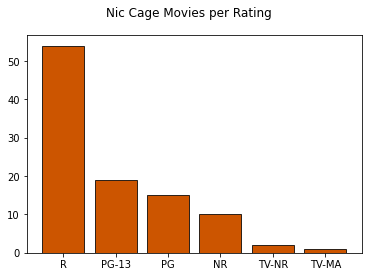

In [6]:
cage_counts = pd.DataFrame(data=[cage["Rating"].value_counts().keys(),cage['Rating'].value_counts()]).T
cage_counts = cage_counts.rename(columns={0:'Rating',1:'Count'})
#cage_counts

fig, ax = plt.subplots()
ax.bar(cage_counts['Rating'],cage_counts['Count'], linewidth=0.8, color="#CC5500",edgecolor="black",align='center')
plt.suptitle('Nic Cage Movies per Rating')
plt.show()

Next, I'm going to calculate the break down of what would be Kid-Friendly and what would not.

In [7]:
# Make a new column indicating whether the movie is kid-friendly or not for kids
# I am considering PG-13 to be kid-friendly, although I recognize this rating is
# more suitable for older children

# kf function to assess rating category and assign binary value
def kf(df, m_rating):
    if 'R' in m_rating or 'MA' in m_rating: 
        # this includes R, NR, TV-NR, etc. and also TV-MA
        return 0
    else:
        # this includes PG, PG-13
        return 1

In [8]:
cage['KF'] = [x for x in range(0,101)] # generate initial values to fill the
# right length for the new column, KF
for i in range(len(cage['KF'])):
    cage.loc[i,'KF'] = kf(cage,cage['Rating'][i])
    # use loc to assign binary 1 (for kids) or 0 (not for kids) per
    # each index
    
cage['KF']

0      0
1      0
2      0
3      1
4      0
      ..
96     1
97     0
98     0
99     0
100    0
Name: KF, Length: 101, dtype: int64

In [9]:
cage

,Movie,Rating,Character,Voice,Year,RottenTomatoes,KF
0,Pig,R,Robin Feld,0,2021,97,0
1,Willy's Wonderland,NR,The Janitor,0,2021,61,0
2,Prisoners of the Ghostland,NR,Hero,0,2021,62,0
3,The Croods: A New Age,PG,Grug,1,2020,77,1
4,Jiu Jitsu,R,Wylie,0,2020,28,0
...,...,...,...,...,...,...,...
96,Racing with the Moon,PG,Nicky,0,1984,60,1
97,Rumble Fish,R,Smokey,0,1983,74,0
98,Valley Girl,R,Randy,0,1983,83,0
99,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,0


In [10]:
cage_kf = cage # Make a copy
cage_kf['Kid-Friendly'] = [x for x in range(0,101)] # generate initial values to fill the
# right length for the new column, Kid-Friendly
for i in range(len(cage['KF'])):
    if cage_kf.loc[i,'KF']==0:
        cage_kf.loc[i,'Kid-Friendly'] = 'Not Kid-Friendly'
    else:
        cage_kf.loc[i,'Kid-Friendly'] = 'Kid-Friendly'
        
cage_kf

,Movie,Rating,Character,Voice,Year,RottenTomatoes,KF,Kid-Friendly
0,Pig,R,Robin Feld,0,2021,97,0,Not Kid-Friendly
1,Willy's Wonderland,NR,The Janitor,0,2021,61,0,Not Kid-Friendly
2,Prisoners of the Ghostland,NR,Hero,0,2021,62,0,Not Kid-Friendly
3,The Croods: A New Age,PG,Grug,1,2020,77,1,Kid-Friendly
4,Jiu Jitsu,R,Wylie,0,2020,28,0,Not Kid-Friendly
...,...,...,...,...,...,...,...,...
96,Racing with the Moon,PG,Nicky,0,1984,60,1,Kid-Friendly
97,Rumble Fish,R,Smokey,0,1983,74,0,Not Kid-Friendly
98,Valley Girl,R,Randy,0,1983,83,0,Not Kid-Friendly
99,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,0,Not Kid-Friendly


It's also important to visualize the data as the two discrete categories I am using for binary classification: 'Kid-Friendly' and 'Not Kid-Friendly'

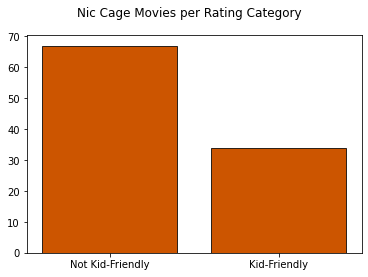

In [11]:
cage_counts_kf = pd.DataFrame(data=[cage_kf['Kid-Friendly'].value_counts().keys(),cage_kf['Kid-Friendly'].value_counts()]).T
cage_counts_kf = cage_counts_kf.rename(columns={0:'KF',1:'Count'})

fig, ax = plt.subplots()
ax.bar(cage_counts_kf['KF'],cage_counts_kf['Count'], linewidth=0.8, color="#CC5500",edgecolor="black",align='center')
plt.suptitle('Nic Cage Movies per Rating Category')
plt.show()

## Prediction Using Machine Learning

Now that I have explored the data, I see that there are about twice as many "Not Kid-Friendly" movies. This means that my categories are not of equal size. Still, I'm going to test out a few models and see what fares well.

In [12]:
# Import machine learning classifiers, tools, and metrics
import sklearn

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2) 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=42)

from sklearn.svm import SVC
svc = SVC(kernel="linear", C=0.025)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)

from sklearn.model_selection import train_test_split

# Import my desired metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Now I'm going to pare down the data set to get rid of non-numeric data.

In [13]:
# Define new data frame with only numerical data
X = cage.drop('Movie',axis=1).reset_index(drop=True).drop('Rating',axis=1).reset_index(drop=True).drop('Character',axis=1).reset_index(drop=True).drop('Kid-Friendly',axis=1).reset_index(drop=True)

In [14]:
# Drop films with no Rotten Tomatoes rating ('X' value)
X = pd.DataFrame(X[X.RottenTomatoes!='X'])
X

,Voice,Year,RottenTomatoes,KF
0,0,2021,97,0
1,0,2021,61,0
2,0,2021,62,0
3,1,2020,77,1
4,0,2020,28,0
...,...,...,...,...
95,0,1984,77,0
96,0,1984,60,1
97,0,1983,74,0
98,0,1983,83,0


In [15]:
# Prepare a training and testing set using a 60%/40% split
X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(['KF'])], X['KF'], test_size=0.4, random_state=123)

In [16]:
# Generate predictions
y_pred_knn = neigh.fit(X_train,y_train).predict(X_test)
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
y_pred_clf = clf.fit(X_train,y_train).predict(X_test)
y_pred_svm = svc.fit(X_train,y_train).predict(X_test)
y_pred_dt = dt.fit(X_train,y_train).predict(X_test)

In [17]:
# Output how many points were mislabeled
print("KNN: Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_knn).sum()))
print("Naive Bayes: Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_gnb).sum()))
print("Random Forest: Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_clf).sum()))
print("Linear SVM: Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_svm).sum()))
print("Decision Tree: Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_dt).sum()))

KNN: Number of mislabeled points out of a total 38 points : 14
Naive Bayes: Number of mislabeled points out of a total 38 points : 13
Random Forest: Number of mislabeled points out of a total 38 points : 15
Linear SVM: Number of mislabeled points out of a total 38 points : 16
Decision Tree: Number of mislabeled points out of a total 38 points : 12


In [18]:
# Define the function outputMetrics to output desired metrics
def outputMetrics(y_test,preds,alg):
    print('Metrics for ' + str(alg))
    # First, accuracy score
    accuracy = accuracy_score(y_test, preds)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    # Next, precision and recall
    if alg != "Linear SVM":
        prec = precision_score(y_test,preds,average="binary")
        rec = recall_score(y_test,preds,average="binary")
        print('Precision: %.2f%%' % (prec * 100.0))
        print('Recall: %.2f%%' % (rec * 100.0))
        # Finally, F1 score
        f_one = f1_score(y_test,preds,average="binary")
        print('F1: %.2f%%' % (f_one * 100.0))
    print('*****')

In [19]:
# Iterate through list of predictions and corresponding list of algorithms used
# for predictive models, then output desired metrics
all_preds = [y_pred_knn, y_pred_gnb, y_pred_clf, y_pred_svm, y_pred_dt]
all_algs = ['KNN', 'Naive Bayes', 'Random Forest','Linear SVM','Decision Tree']
for i in range(0,5):
    outputMetrics(y_test,all_preds[i],all_algs[i])

Metrics for KNN
Accuracy: 63.16%
Precision: 62.50%
Recall: 31.25%
F1: 41.67%
*****
Metrics for Naive Bayes
Accuracy: 65.79%
Precision: 100.00%
Recall: 18.75%
F1: 31.58%
*****
Metrics for Random Forest
Accuracy: 60.53%
Precision: 54.55%
Recall: 37.50%
F1: 44.44%
*****
Metrics for Linear SVM
Accuracy: 57.89%
*****
Metrics for Decision Tree
Accuracy: 68.42%
Precision: 59.09%
Recall: 81.25%
F1: 68.42%
*****


## Preliminary findings

Both the Naive Bayes and Decision Tree classifers are somewhat successful models. When considering all metrics, it is my opinion that the Decision Tree model fared the best.

In previous work, I have noticed that there's not much of a pattern over time with the Rotten Tomatoes scores. I imagine that it's not a particularly informative variable here, so I will move forward without using that feature as part of the model.

In [20]:
# Prepare a training and testing set using a 60%/40% split, same as above
# Remove both KF and RottenTomatoes
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X[X.columns.difference(['KF','RottenTomatoes'])], X['KF'], test_size=0.4, random_state=123)

In [21]:
# Generate predictions
y_pred_knn_two = neigh.fit(X_train_two,y_train_two).predict(X_test_two)
y_pred_gnb_two = gnb.fit(X_train_two,y_train_two).predict(X_test_two)
y_pred_clf_two = clf.fit(X_train_two,y_train_two).predict(X_test_two)
y_pred_svm_two = svc.fit(X_train_two,y_train_two).predict(X_test_two)
y_pred_dt_two = dt.fit(X_train_two,y_train_two).predict(X_test_two)

In [22]:
# Output how many points were mislabeled
print("KNN: Number of mislabeled points out of a total %d points : %d"% (X_test_two.shape[0], (y_test_two != y_pred_knn_two).sum()))
print("Naive Bayes: Number of mislabeled points out of a total %d points : %d"% (X_test_two.shape[0], (y_test_two != y_pred_gnb_two).sum()))
print("Random Forest: Number of mislabeled points out of a total %d points : %d"% (X_test_two.shape[0], (y_test_two != y_pred_clf_two).sum()))
print("Linear SVM: Number of mislabeled points out of a total %d points : %d"% (X_test_two.shape[0], (y_test_two != y_pred_svm_two).sum()))
print("Decision Tree: Number of mislabeled points out of a total %d points : %d"% (X_test_two.shape[0], (y_test_two != y_pred_dt_two).sum()))

KNN: Number of mislabeled points out of a total 38 points : 14
Naive Bayes: Number of mislabeled points out of a total 38 points : 13
Random Forest: Number of mislabeled points out of a total 38 points : 11
Linear SVM: Number of mislabeled points out of a total 38 points : 16
Decision Tree: Number of mislabeled points out of a total 38 points : 13


In [23]:
# Iterate through list of predictions and corresponding list of algorithms used
# for predictive models, then output desired metrics
all_preds_two = [y_pred_knn_two, y_pred_gnb_two, y_pred_clf_two, y_pred_svm_two, y_pred_dt_two]
all_algs_two = ['KNN', 'Naive Bayes', 'Random Forest','Linear SVM','Decision Tree']
for i in range(0,5):
    outputMetrics(y_test_two,all_preds_two[i],all_algs_two[i])

Metrics for KNN
Accuracy: 63.16%
Precision: 66.67%
Recall: 25.00%
F1: 36.36%
*****
Metrics for Naive Bayes
Accuracy: 65.79%
Precision: 100.00%
Recall: 18.75%
F1: 31.58%
*****
Metrics for Random Forest
Accuracy: 71.05%
Precision: 69.23%
Recall: 56.25%
F1: 62.07%
*****
Metrics for Linear SVM
Accuracy: 57.89%
*****
Metrics for Decision Tree
Accuracy: 65.79%
Precision: 61.54%
Recall: 50.00%
F1: 55.17%
*****


## Preliminary findings

When a less informative variable (Rotten Tomatoes score) removed, some models perform slightly better. Most notably, the Random Forest classifier is now over 70% in terms of accuracy, with decent metrics. Some models, such as the Linear SVM, did not show a change.

# Preliminary Conclusion

* There does not seem to be a strong pattern when the following aspects of a movie are considered: Voice acting role (yes or no), Year of release, and Rotten Tomatoes score.
* A stronger relationship is shown once the RT score is removed, although not substantially stronger.
* These data features do not fully predict whether a Nic Cage movie will be okay for young children or young teens.